In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('train_mdf.csv')

In [3]:
df_org = df_all.drop(['Id'], axis=1, inplace=False)
df = df_org.copy()

# Data Preprocessing

## Missing Value
1. delete columns
2. -> int 0
3. -> object 'None'
4. -> mode

In [4]:
# delete cols
df = df.drop(['Alley', 'PoolArea', 'PoolQC', 'MiscFeature'], axis=1, inplace=False)

In [5]:
# -> int 0
df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']] \
= df[['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']].fillna(0)

In [6]:
# -> 'None'
df['MasVnrType'] = df['MasVnrType'].fillna(value = 'None')

In [7]:
# -> mode
df['Electrical'] = df['Electrical'].fillna(value = 'SBrkr')

# df['Electrical'].mode()
# df['Electrical'].value_counts()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Data Type

In [9]:
# int -> object
df = df.astype({'MSSubClass': 'str'})

In [10]:
# object -> int : Likert Scale
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond']] \
= df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
   'GarageQual', 'GarageCond']].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po' : 1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Numerical Features

In [12]:
# Numerical Features including SalePrice (int64 & float64)
tNum = df.select_dtypes(exclude = 'object').columns

print(len(tNum))
tNum

44


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# Numerical Features excluding SalePrice (int64 & float64)
num = tNum[:-1]

print(len(num))
num

43


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [14]:
tNum_df = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
tNum_df.head(10)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   
5         85.0    14115            5            5       1993          1995   
6         75.0    10084            8            5       2004          2005   
7          0.0    10382            7            6       1973          1973   
8         51.0     6120            7            5       1931          1950   
9         50.0     7420            5            6       1939          1950   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageCond  WoodDeckSF  \
0       196.0          4          3         4  ...           3           0   
1         0.0          3          3         4  ...           3         298   
2       162.0          4          3         4  ...           3           0   
3         0.0          3          3         3  ...           3           0   
4       350.0          4          3         4  ...           3         192   
5         0.0          3          3         4  ...           3          40   
6       186.0          4          3         5  ...           3         255   
7       240.0          3          3         4  ...           3         235   
8         0.0          3          3         3  ...           3          90   
9         0.0          3          3         3  ...           3           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  \
0           61              0          0            0        0       2   
1            0              0          0            0        0       5   
2           42              0          0            0        0       9   
3           35            272          0            0        0       2   
4           84              0          0            0        0      12   
5           30              0        320            0      700      10   
6           57              0          0            0        0       8   
7          204            228          0            0      350      11   
8            0            205          0            0        0       4   
9            4              0          0            0        0       1   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     140000  
4    2008     250000  
5    2009     143000  
6    2007     307000  
7    2009     200000  
8    2008     129900  
9    2008     118000  

[10 rows x 44 columns]

In [15]:
num_df = tNum_df.drop(['SalePrice'], axis=1, inplace=False)
num_df.head(10)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   
5         85.0    14115            5            5       1993          1995   
6         75.0    10084            8            5       2004          2005   
7          0.0    10382            7            6       1973          1973   
8         51.0     6120            7            5       1931          1950   
9         50.0     7420            5            6       1939          1950   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageQual  GarageCond  \
0       196.0          4          3         4  ...           3           3   
1         0.0          3          3         4  ...           3           3   
2       162.0          4          3         4  ...           3           3   
3         0.0          3          3         3  ...           3           3   
4       350.0          4          3         4  ...           3           3   
5         0.0          3          3         4  ...           3           3   
6       186.0          4          3         5  ...           3           3   
7       240.0          3          3         4  ...           3           3   
8         0.0          3          3         3  ...           2           3   
9         0.0          3          3         3  ...           4           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   
5          40           30              0        320            0      700   
6         255           57              0          0            0        0   
7         235          204            228          0            0      350   
8          90            0            205          0            0        0   
9           0            4              0          0            0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  
5      10    2009  
6       8    2007  
7      11    2009  
8       4    2008  
9       1    2008  

[10 rows x 43 columns]

### Categorical Features

In [16]:
cat = df.select_dtypes("object").columns

print(len(cat))
cat

32


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

# Data Analysis - Regression

## SalePrice Prediction with Numerical Features

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# RMSE 반환 함수
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [19]:
# LinearRegression, Ridge, Lasso, ElasticNet
y = df['SalePrice']
X = num_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

elaNet_reg = ElasticNet()
elaNet_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
get_rmses(models)

LinearRegression RMSE:  35326.316
Ridge RMSE:  35320.754
Lasso RMSE:  35325.454
ElasticNet RMSE:  36317.49


[35326.31624470898, 35320.75366221181, 35325.45351960603, 36317.490485353985]

### <span style='color:green'> **Q. Coefficients값이 이렇게 클수도 있나요? O** </span>

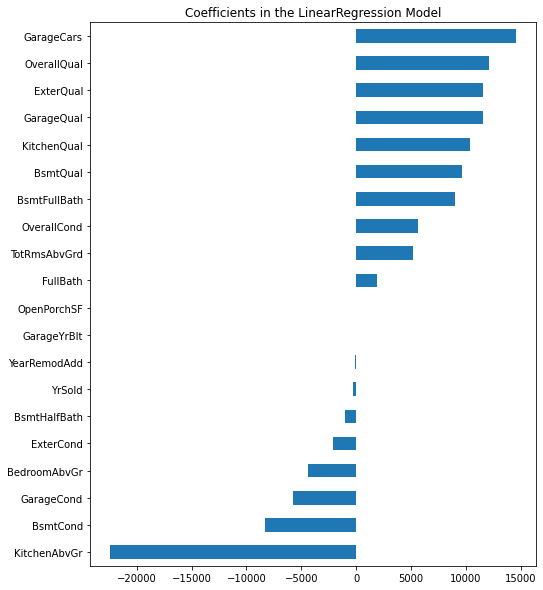

In [20]:
lr_coef = pd.Series(data=np.round(lr_reg.coef_, 2), index = X.columns)
# lr_coef.sort_values(ascending=False)

imp_coef = pd.concat([lr_coef.sort_values().head(10), 
                      lr_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the LinearRegression Model")
plt.show()

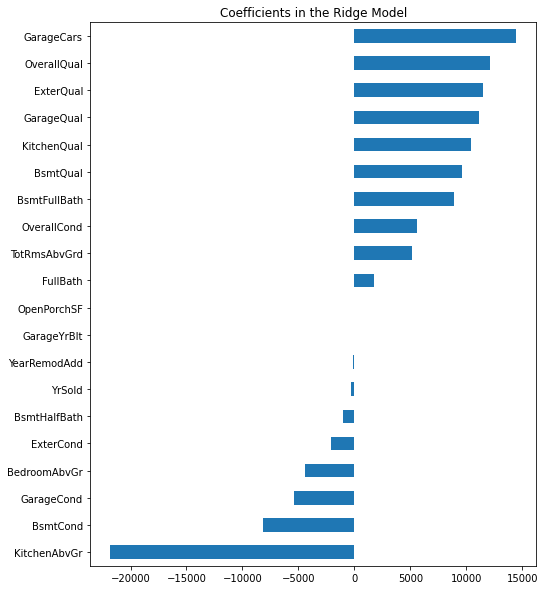

In [21]:
ridge_coef = pd.Series(data=np.round(ridge_reg.coef_, 2), index = X.columns)
# ridge_coef.sort_values(ascending=False)

imp_coef = pd.concat([ridge_coef.sort_values().head(10), 
                      ridge_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

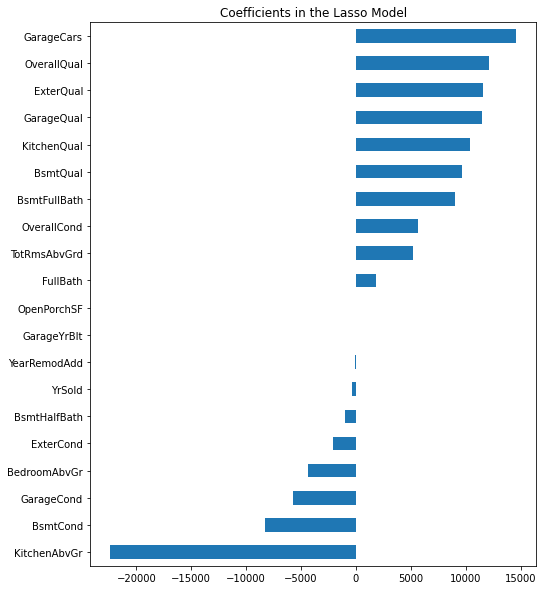

In [22]:
lasso_coef = pd.Series(data=np.round(lasso_reg.coef_, 2), index = X.columns)
lasso_coef.sort_values(ascending=False)

imp_coef = pd.concat([lasso_coef.sort_values().head(10), 
                      lasso_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

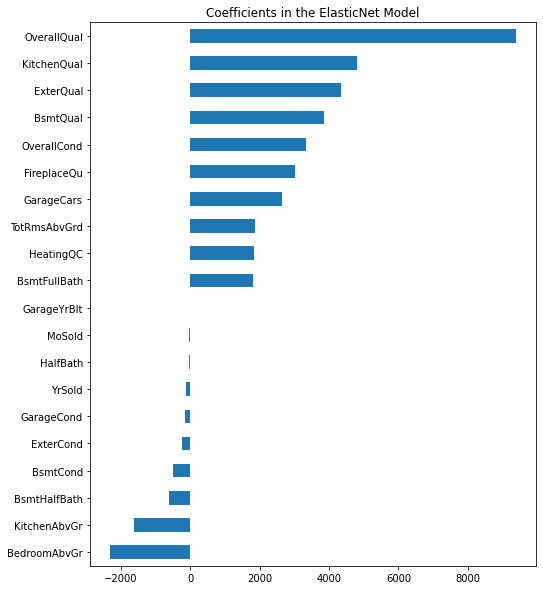

In [23]:
elaNet_coef = pd.Series(data=np.round(elaNet_reg.coef_, 2), index = X.columns)
elaNet_coef.sort_values(ascending=False)

imp_coef = pd.concat([elaNet_coef.sort_values().head(10), 
                      elaNet_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [24]:
def get_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=True).head(n)
    
    return coef_high, coef_low

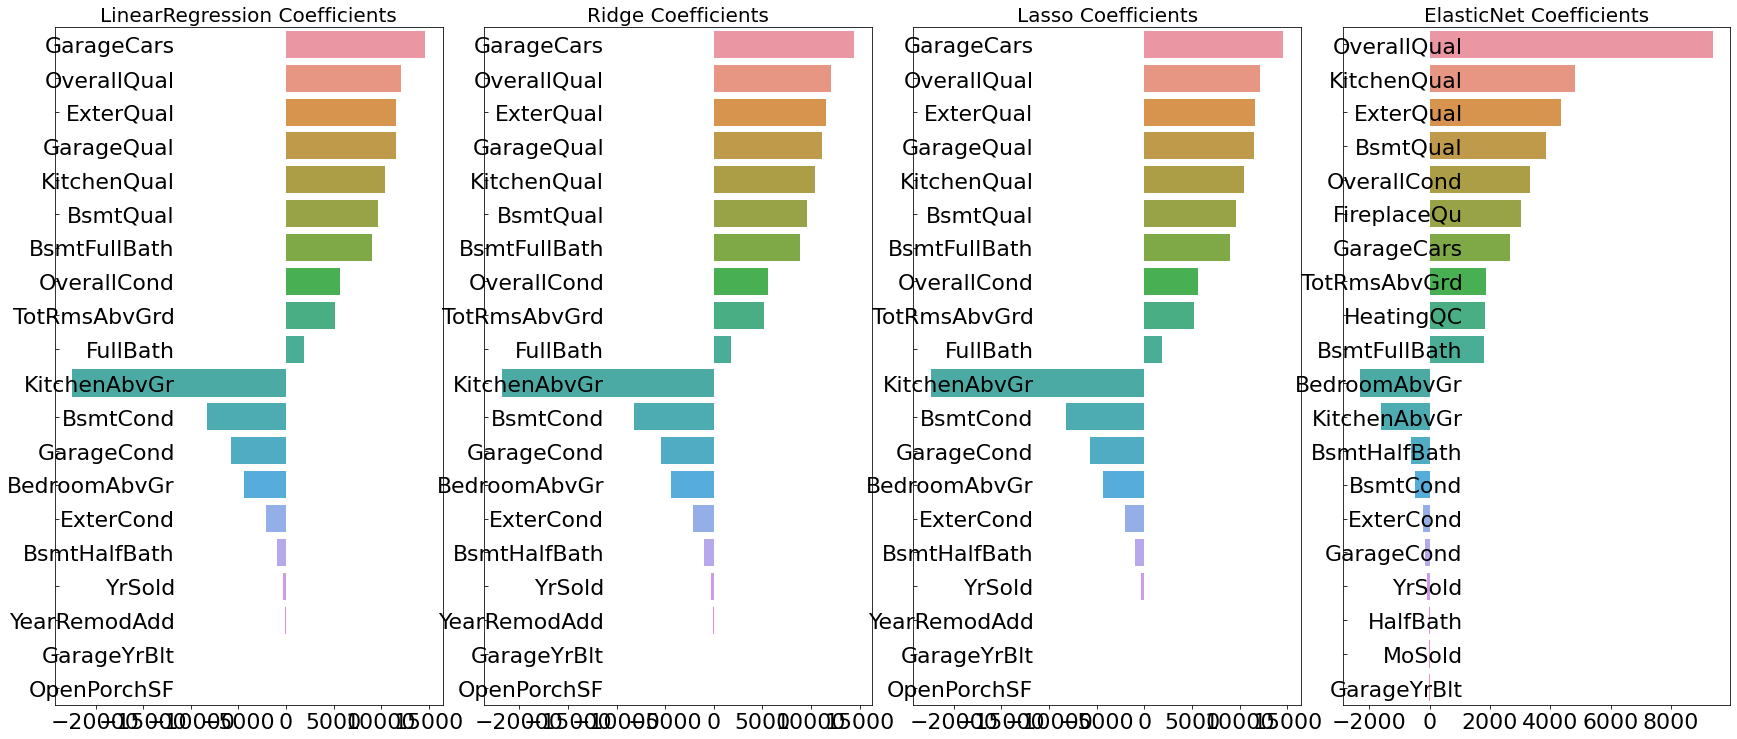

In [25]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=4)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=20)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
visualize_coef(models)

### 'SalePrice' Log Transformation

In [26]:
# log 변환 'SalePrice'를 포함할 df 새로 지정
df_log = df.copy()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

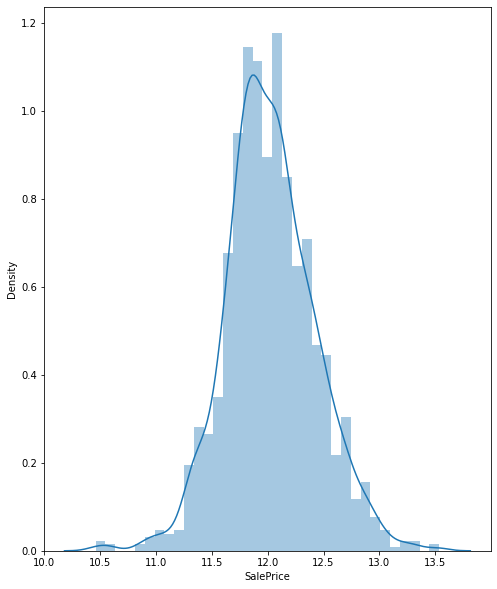

In [27]:
log_sp = np.log1p(df_log['SalePrice'])
sns.distplot(log_sp)

In [28]:
log_sp

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [29]:
# LinearRegression, Ridge, Lasso, ElasticNet
y = log_sp
X = num_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

elaNet_reg = ElasticNet()
elaNet_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
get_rmses(models)

LinearRegression RMSE:  0.149
Ridge RMSE:  0.149
Lasso RMSE:  0.191
ElasticNet RMSE:  0.184


[0.14895305689862087,
 0.1489063908647621,
 0.19072296168693476,
 0.18351554674247078]

### <span style='color:red'> **Q. log 변환 후 RMSE 값 해석?** </span>

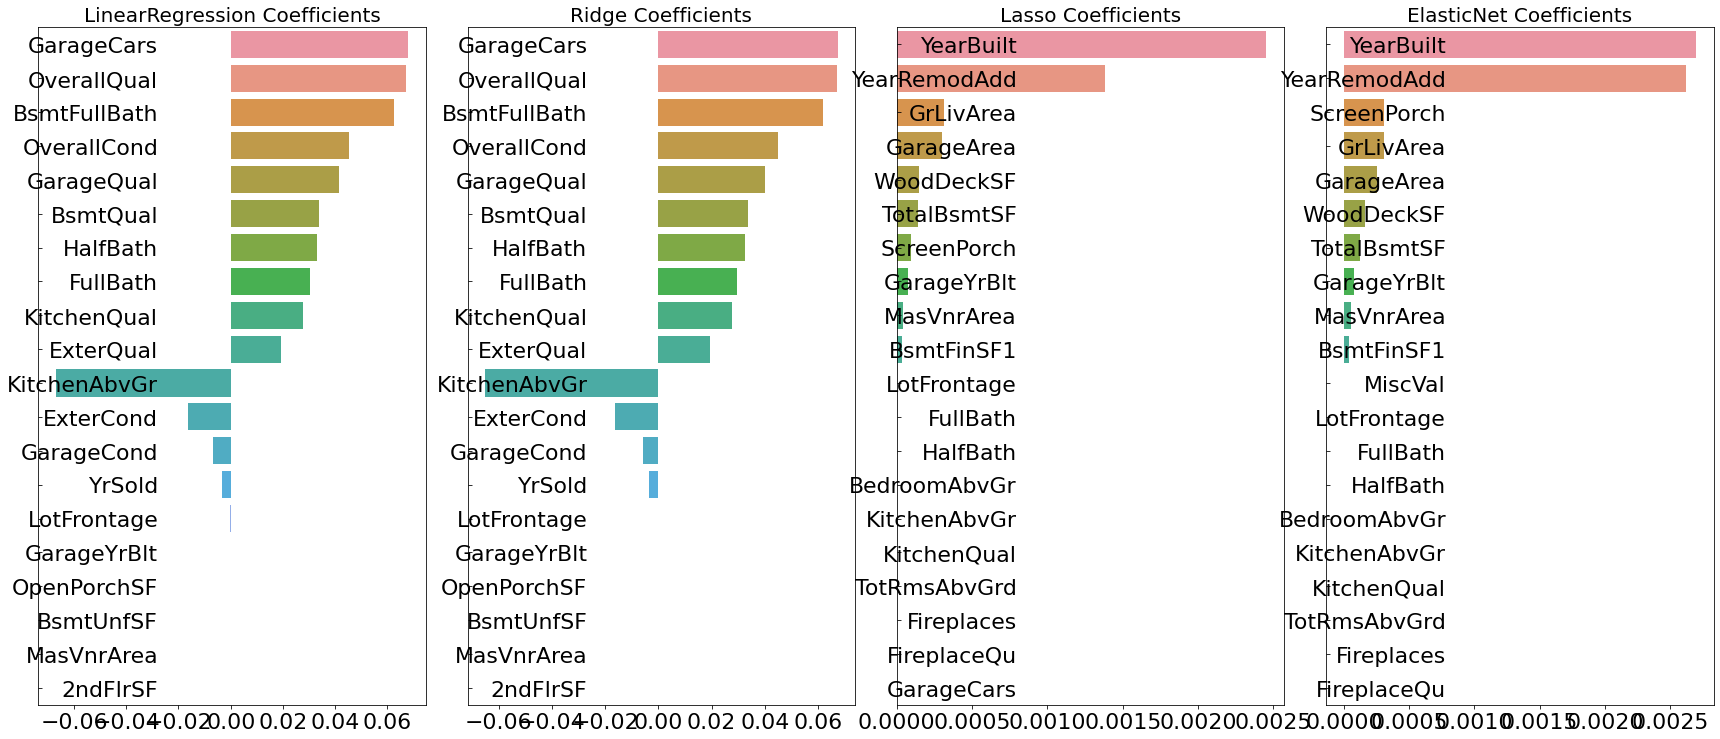

In [30]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=4)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=20)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
visualize_coef(models)

## SalePrice Prediction with All Features

In [31]:
# Original 'SalePrice' & One-Hot Encoding

# One-Hot Encoding
df_ohe = pd.get_dummies(df)


# Linear Models
y = df_ohe['SalePrice']
X = df_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

elaNet_reg = ElasticNet()
elaNet_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
get_rmses(models)

LinearRegression RMSE:  31000.869
Ridge RMSE:  30262.202
Lasso RMSE:  29992.334
ElasticNet RMSE:  34875.634


[31000.869134175013, 30262.201582342022, 29992.33414078494, 34875.6341324163]

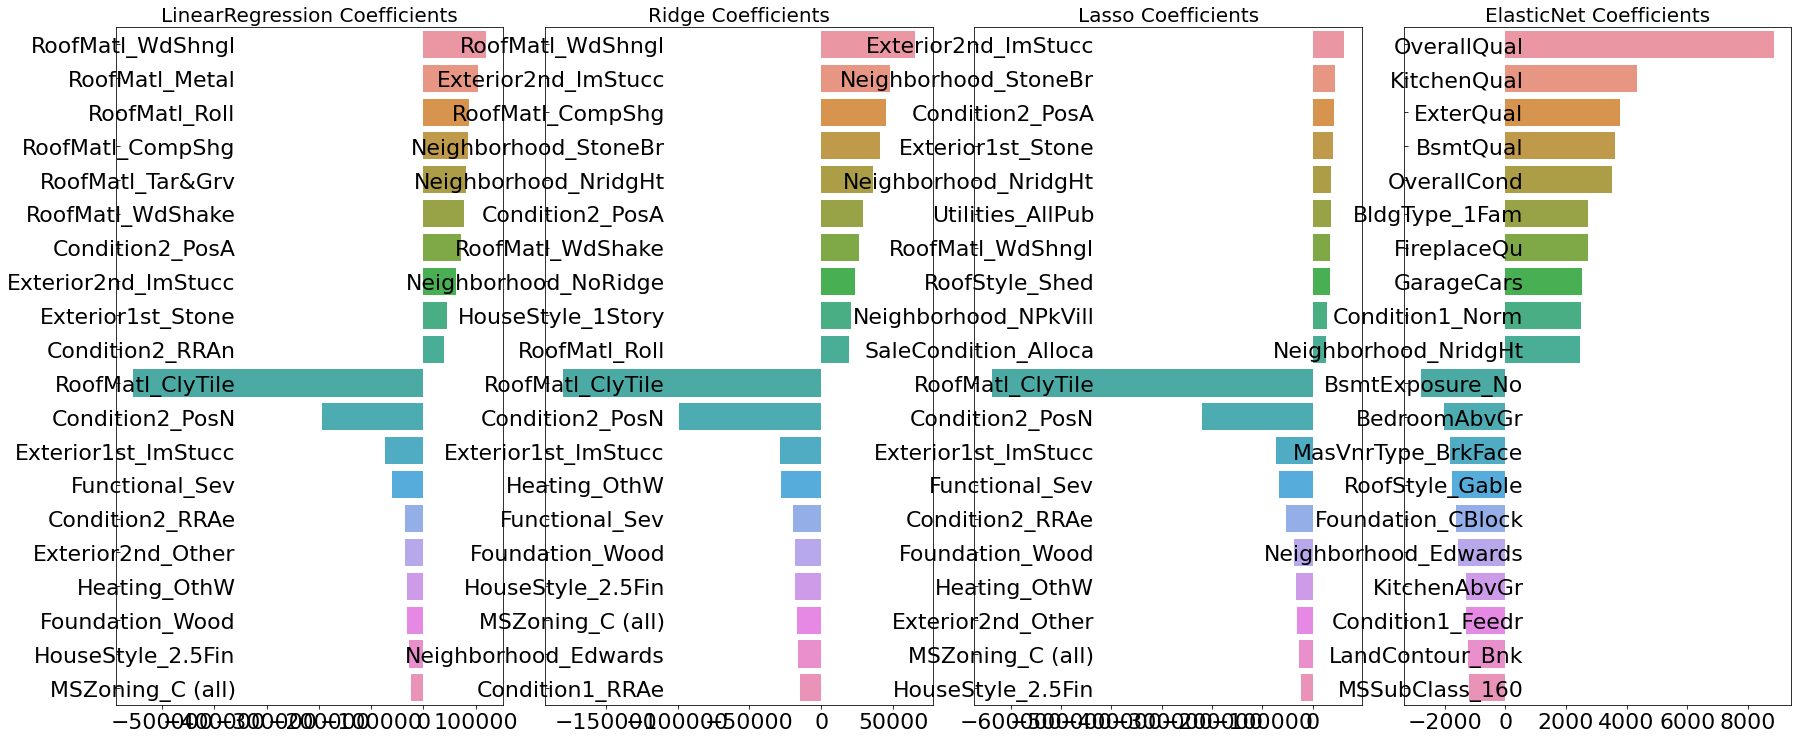

In [32]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=4)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=20)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
visualize_coef(models)

### 'SalePrice' Log Transformation

In [33]:
# Log Transformed 'SalePrice' & One-Hot Encoding

# Log Transformation
df_log['SalePrice'] = np.log1p(df_log['SalePrice'])

# One-Hot Encoding -> df_log_ohe
df_log_ohe = pd.get_dummies(df_log)


# Linear Models
y = df_log_ohe['SalePrice']
X = df_log_ohe.drop('SalePrice', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

elaNet_reg = ElasticNet()
elaNet_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
get_rmses(models)

LinearRegression RMSE:  0.128
Ridge RMSE:  0.125
Lasso RMSE:  0.191
ElasticNet RMSE:  0.184


[0.12802412413174416,
 0.12537532552705163,
 0.19072296168693476,
 0.18351554674247078]

## Coefficients Visualization

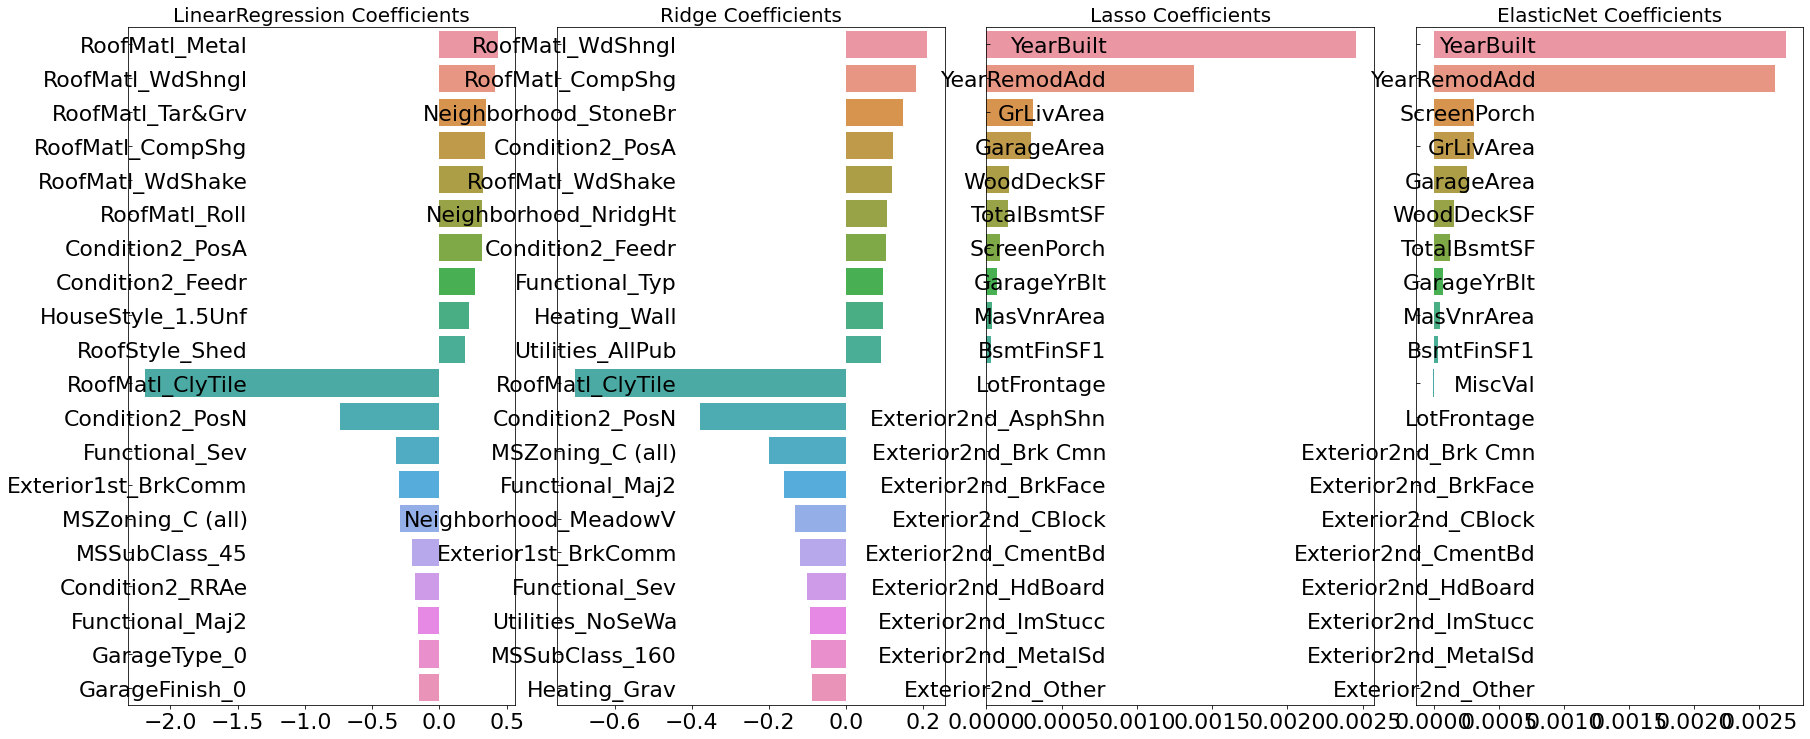

In [34]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=4)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=20)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg, elaNet_reg]
visualize_coef(models)

# Data Analysis - Tree Classification

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
df_ohe = pd.get_dummies(df)

y = df_ohe['OverallQual']
X = df_ohe.drop('OverallQual', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.5376712328767124

In [37]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=True,
                feature_names=X.columns, impurity=True, filled=True)

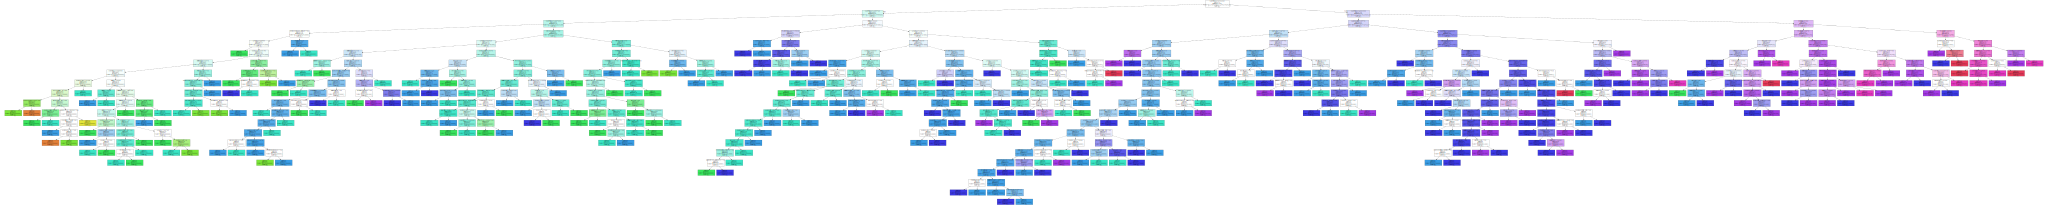

In [38]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [39]:
# .png 파일 변환 저장 후 출력
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename='decision-tree.png')

In [40]:
# default hyperparameters
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [41]:
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.5684931506849316

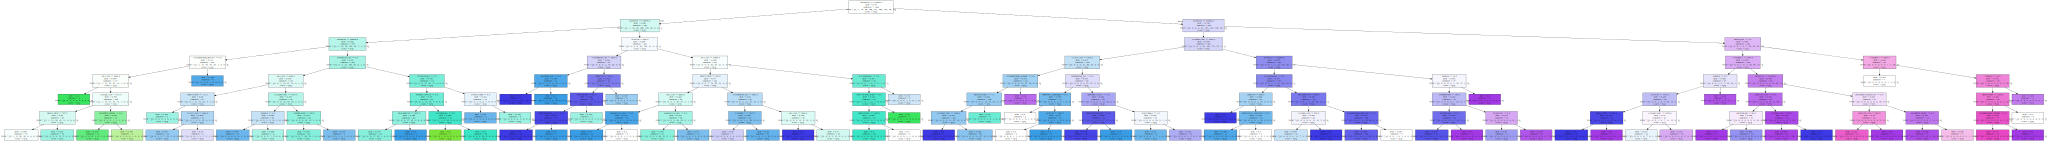

In [42]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=True,
                feature_names=X.columns, impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<AxesSubplot:>

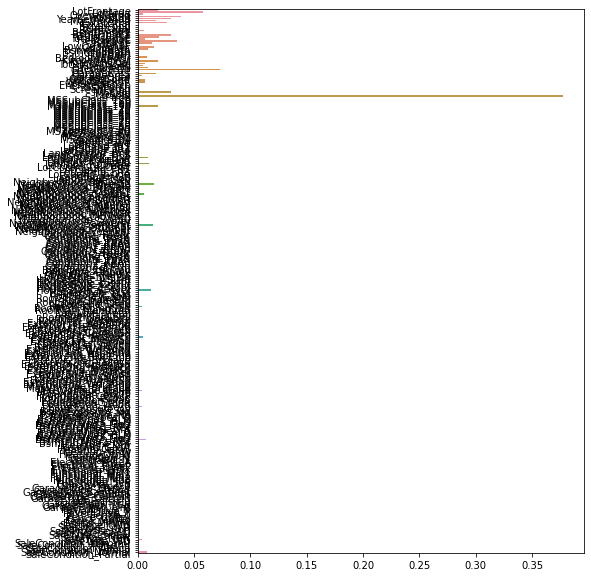

In [43]:
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최적 평균 정확도 수치: {0:.4f}' .format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최적 평균 정확도 수치: 0.4906
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 6}


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.0s finished


In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [4, 6, 8, 12, 16, 20],
    'min_samples_split' : [10, 20, 30, 40, 50]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최적 평균 정확도 수치: {0:.4f}' .format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 30 candidates, totalling 300 fits
GridSearchCV 최적 평균 정확도 수치: 0.4923
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_split': 40}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   11.6s finished


In [46]:
best_dt_clf = grid_cv.best_estimator_

pred1 = best_dt_clf.predict(X_test)
print('결정 트리 예측 정확도: {0:.4f}' .format(accuracy_score(y_test, pred1)))

결정 트리 예측 정확도: 0.5685


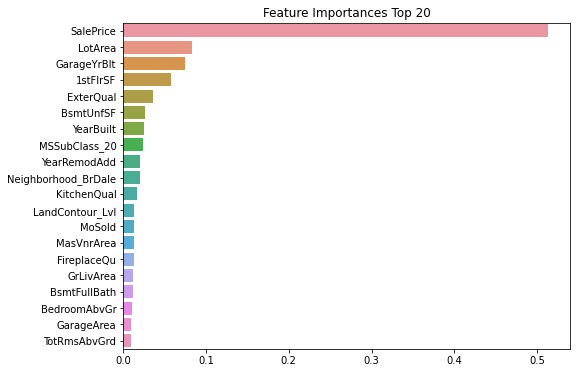

In [47]:
ftr_importances_values = best_dt_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'. format(accuracy))

랜덤 포레스트 정확도 : 0.5993


In [50]:
params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf' : [6, 8, 12, 18],
    'min_samples_split' : [6, 8, 16, 20],
    'max_features' : [10, 20, 30, 40]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=7, n_jobs=-1)

grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

KeyboardInterrupt: 

In [ ]:
best_rf_clf = grid_cv.best_estimator_

pred1 = best_rf_clf.predict(X_test)
print('랜덤 포레스트 예측 정확도: {0:.4f}' .format(accuracy_score(y_test, pred1)))

In [ ]:
ftr_importances_values = best_rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20 - RF')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]

# train
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_metric='logloss', eval_set=evals, verbose=True)

# predict
preds = lgbm_wrapper.predict(X_test)

In [ ]:
print('LightGBM 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, preds)))

In [ ]:
accuracy = accuracy_score(y_test, preds)

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 30))
plot_importance(lgbm_wrapper, ax=ax)